In [1]:
import sys
import os
sys.path.append('/root/GanLuo/PullSum_MNIST/code/神经网络实验/MNIST最终实验')
import torch
import numpy as np 
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *
from new_network_func import *
from search_parameter import *
import optuna

In [2]:
n=10
h_data,y_data,X_test,y_test=prepare_node_10_hard_linear_mix(p1=0.95)

In [3]:
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
#A,C=ring3()
#A=get_xinmeng_like_matrix(n=n,seed=29).T#2929

A,C=di_ring(n=10)

show_row(A)

M = 2
A_M = np.linalg.matrix_power(A, M)
n = A.shape[0]
one = np.ones(n)
result = np.dot(one,A_M)
t = np.diag(1/result)
A=A_M
B=A_M@t


show_row(A)
_,__=test_row(A,epochs=1000)
print(f"{_:.4e}, {__:.4e}\n")
show_col(B)

A的第二大特征值: 0.88149843072359
A的beta: 0.951212670347466
A的spectral gap: 0.04878732965253396
A的kappa: 2.00000000000001
S_A是: 219.49147627446408 

A的第二大特征值: 0.7770394833681482
A的beta: 0.8972340297420174
A的spectral gap: 0.10276597025798262
A的kappa: 2.0000000000000067
S_A是: 104.20183823537444 

1.9420e+00, 6.1440e+02

B的第二大特征值: 0.8120796839261178
B的beta: 0.9028939557376235
B的spectral gap: 0.09710604426237646
B的kappa: 1.6512899732003077
S_B是: 97.79699113199611 



Training Progress:   0%|          | 0/100 [00:01<?, ?it/s, accuracy=12.5600000000%, epoch=1, loss=2.3840873718]/tmp/ipykernel_13349/1442043269.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_history = pd.concat([df_history, current_epoch_data], ignore_index=True)
Training Progress: 100%|██████████| 100/100 [02:28<00:00,  1.49s/it, accuracy=72.8000000000%, epoch=100, loss=2.2093606949]


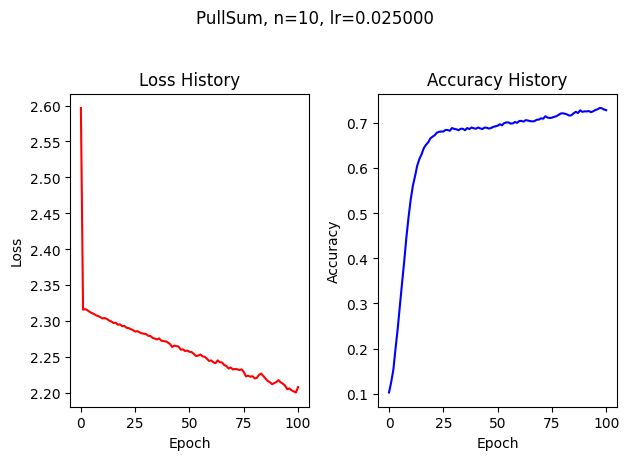

In [4]:
generator = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=100,
    lr=2.5e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    batch_size=int(500*M),
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

df_history = pd.DataFrame(columns=["epoch", "loss", "accuracy"])

for epoch, (loss_history, accuracy_history) in enumerate(generator, start=1):
    # 获取当前epoch的最新数据
    Sum_l = loss_history[-1]  # 获取当前 epoch 的训练损失
    Sum_a = accuracy_history[-1]  # 获取当前 epoch 的测试集准确率
    current_epoch_data = pd.DataFrame({
        "epoch": [epoch],
        "loss": [Sum_l],
        "accuracy": [Sum_a]
    })
    df_history = pd.concat([df_history, current_epoch_data], ignore_index=True)
    df_history.to_csv("/root/GanLuo/PullSum_MNIST/data/实验2-3,MG=2,batch_size=1000,2.5e-3.csv", index=False)

In [38]:
df1=pd.read_csv("/root/GanLuo/PullSum_MNIST/实验1,MG=1,batch_size=500,1e-3.csv")
df2=pd.read_csv("/root/GanLuo/PullSum_MNIST/实验2,MG=2,batch_size=1000,1e-3.csv")
df3_1=pd.read_csv("/root/GanLuo/PullSum_MNIST/实验3,MG=5,batch_size=2000,1e-3.csv")
df3_2=pd.read_csv("/root/GanLuo/PullSum_MNIST/实验3,MG=5,batch_size=2000,3e-3.csv")
df3_3=pd.read_csv("/root/GanLuo/PullSum_MNIST/实验3,MG=5,batch_size=2000,4e-3.csv")
df3_4=pd.read_csv("/root/GanLuo/PullSum_MNIST/实验3,MG=5,batch_size=2000,5e-3.csv")

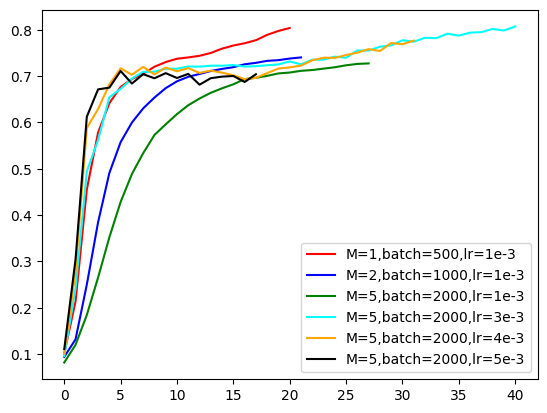

In [39]:
plt.plot(df1['accuracy'],color='r',label='M=1,batch=500,lr=1e-3')
plt.plot(df2['accuracy'],color='b',label='M=2,batch=1000,lr=1e-3')
plt.plot(df3_1['accuracy'],color='g',label='M=5,batch=2000,lr=1e-3')
plt.plot(df3_2['accuracy'],color='cyan',label='M=5,batch=2000,lr=3e-3')
plt.plot(df3_3['accuracy'],color='orange',label='M=5,batch=2000,lr=4e-3')
plt.plot(df3_4['accuracy'],color='black',label='M=5,batch=2000,lr=5e-3')
plt.legend()
plt.show()

In [13]:
df_01 = pd.read_csv("/root/GanLuo/PullSum_MNIST/data/实验1-1,MG=1,batch_size=500,1e-3.csv")
df_02 = pd.read_csv("/root/GanLuo/PullSum_MNIST/data/实验2-3,MG=2,batch_size=1000,2.5e-3.csv")
df_05 = pd.read_csv("/root/GanLuo/PullSum_MNIST/data/实验3,MG=5,batch_size=2500,5e-3.csv")

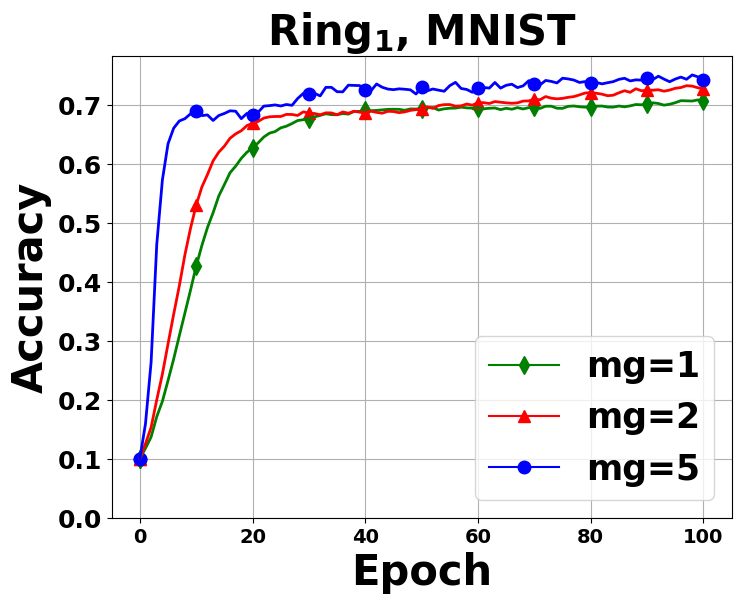

In [15]:
# plot the results
from matplotlib.font_manager import FontProperties
a = 101
grads = [df_01["accuracy"][:a], df_02["accuracy"][:a], df_05["accuracy"][:a]]
legend = ['mg=1', 'mg=2', 'mg=5']
title = r"Ring$\mathbf{_1}$, MNIST"
save = '/root/GanLuo/PullSum_MNIST/MNIST, MG.pdf'
ylabel = 'Accuracy'

plt.rcParams['figure.figsize'] = 8, 6
plt.figure()
xlen = len(grads[0])
colors = ['green', 'red', 'blue', 'orange']
markers = ['d', '^', 'o', '<']
idx_set = np.arange(0, xlen, xlen // 10)

for i in range(len(grads)):
    plt.plot(0, grads[i][0], color=colors[i], marker=markers[i], markersize=9)

for i in range(len(grads)):
    for idx in idx_set:
        plt.plot(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=9, linestyle='None')

for i in range(len(grads)):
    plt.plot(np.arange(xlen), grads[i], linewidth=2.0, color=colors[i])

font_properties = FontProperties(weight='bold', size=25)
plt.legend(legend, prop=font_properties, loc='lower right')  # Legend in the lower right corner
plt.xlabel('Epoch', fontsize=30, fontweight='bold')
plt.ylabel(ylabel, fontsize=30, fontweight='bold')
plt.title(title, fontsize=30, fontweight='bold') 
plt.grid(True)

# Set denser y-ticks
y_ticks = np.arange(0, 0.8, 0.1)  # Adjust this range and step as needed
plt.yticks(y_ticks, fontsize=18, fontweight='bold')

plt.xticks(fontsize=14, fontweight='bold')
plt.savefig(save, bbox_inches='tight')
plt.show()